## Autoencoder


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


이제는 익숙한 tensorflow,numpy, 결과출력을 위한 matplotlib, 그리고 MNIST 모듈을 import하고 학습시킬 데이터를 준비합니다.

In [0]:
learning_rate = 0.01
rtaining_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

이번에는 다음과 같이 하이퍼파라미터로 사용할 옵션들을 따로 빼내어 코드를 조금 구조화 시켰습니다.   
```learning_rate```은 최적화 함수에서 사용할 학습률,   
 ```training_epoch```는 전체 데이터를 학습시킬 총횟수,    
 ```batch_size```는 미니배치로 한번에 학습할 데이터(이미지)의 갯수입니다.   
  ```n_hidden```은 은닉층의 뉴런수(여기서 은닉층의 수가 입력층의 수보다 작다는 것 입니다.),    
  ```n_input``` 은 MNIST의 이미지의 크기가 28X28이므로 784로 지정합니다
***
Autoencoder의 핵심 모델은 README에서 설명했던것과 같이 인코더와 디코더를 구성하는 것입니다. 인코더와 디코더의 구성에 따라 다양한 Autoencoder를 만들 수 있기만 우리는 가장 기본적인 구조를 만들어 보겠습니다.

In [0]:
X=tf.placeholder(tf.float32,[None, n_input])
W_encode = tf.Variable(tf.random_normal([n_input,n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode))

먼저 신경망 모델을 구성하기 위해 X의 placeholder를 설정합니다.   
**이 모델은 비지도 학습이므로 Y가 없습니다.**   
다음으로 인코더의 가중치를 [입력층 수,은닉층 수]로 설정하고 인코더를 구성합니다.

In [0]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))

디코더도 인코더와 같이 구성합니다. 참고로 decoder는 [은닉층 수, 출력층 수]로 설정합니다. 여기서 입력층 수와 출력층 수가 같으므로 n_input을 사용하였습니다.

In [0]:
cost = tf.reduce_mean(tf.pow(X - decoder,2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

우리가 만든 기본적인 Autoencoder의 목적이 출력값을 입력값과 최대한 비슷하게 만드는 것이므로 손실함수를 X - decoder의 제곱(```tf.pow( ,2)``` )을 시켜 주고 ```tf.reduce_mean```을 이용해 전체의 평균값 즉 하나의 실수값으로 나타냅니다.   
마지막으로 ```RMSPropOptimizer```함수를 이용한 최적화 함수를 설정합니다. 

In [9]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
  total_cost = 0
  for i in range(total_batch):
    batch_xs,batch_ys = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([optimizer,cost],feed_dict = {X:batch_xs})
    total_cost += cost_val
  print('Epoch:', '%04d' % (epoch+1), 'Avg. cost =', '{:.4f}'.format(total_cost/total_batch))

print('최적화 완료')

Epoch: 0001 Avg. cost = 0.2008
Epoch: 0002 Avg. cost = 0.0645
Epoch: 0003 Avg. cost = 0.0498
Epoch: 0004 Avg. cost = 0.0445
Epoch: 0005 Avg. cost = 0.0422
Epoch: 0006 Avg. cost = 0.0409
Epoch: 0007 Avg. cost = 0.0401
Epoch: 0008 Avg. cost = 0.0392
Epoch: 0009 Avg. cost = 0.0375
Epoch: 0010 Avg. cost = 0.0371
Epoch: 0011 Avg. cost = 0.0363
Epoch: 0012 Avg. cost = 0.0353
Epoch: 0013 Avg. cost = 0.0350
Epoch: 0014 Avg. cost = 0.0342
Epoch: 0015 Avg. cost = 0.0326
최적화 완료


이제 학습을 진행하는 코드를 작성해 학습을 해봅시다.

In [0]:
sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

이번에는 결과값을 정확도가 아닌 직관적으로 보기위 해 matplotlib을 이용해 이미지로 출력해 봅시다.   
먼저 총 10개의 테스트 데이터를 가져와 디코더를 이용해 출력값으로 만듭니다.

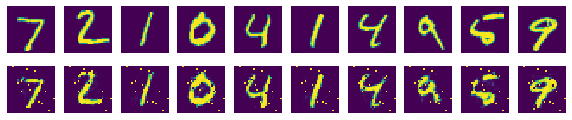

In [11]:
fig, ax = plt.subplots(2, sample_size, figsize =(sample_size,2))

for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
  ax[1][i].imshow(np.reshape(samples[i],(28,28)))

plt.show()

그런 다음 np.reshpe을 이용해 28 x 28 크기의 이미지 데이터로 재구성 한뒤 matplotlib의 imshow 함수를 이용해 그래프에 이미지로 출력합니다.   
위쪽에는 입력값의 이미지를 아래쪽에는 신경망으로 생성한 이미지를 출력합니다.